<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; min-width: 250px; display: flex; justify-content: center;">
        <img src="https://adnova.novaims.unl.pt/media/22ui3ptm/logo.svg" style="max-width: 80%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style='color:#6f800f'> Data Mining Project | </span>
            <span style='color:#393B79'>ABCDEats Inc.</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Filipa Pereira, 20240509</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#6f800f, #393B79); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [1]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# For density based clustering
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from tqdm import tqdm                                       # Progress bar

# Set the style of the visualization
pd.set_option('display.max_columns', None)                  # display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #6f800f,#393B79); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 2 | Density Based Clustering </b></h1></center>
</div>

## **🧮 Import Data**

In [2]:
# Importing the dataset after the preprocessing
# ! pip install pyarrow
ABCDEats = pd.read_parquet('data/DM2425_ABCDEats_preprocessed.parquet')

In [3]:
# Display the first 5 rows just to confirm the import was successful
ABCDEats.head() 

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,1.24,-0.40,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-

In [4]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 31279
Number of columns : 122


In [5]:
# Check the data types
ABCDEats.dtypes

customer_region               object
customer_age                 float64
vendor_count                 float64
product_count                float64
chain_count                  float64
                              ...   
CUI_Beverages_Thai_PC        float64
HR_Lunch_Dinner_PC           float64
HR_LateNight_Breakfast_PC    float64
HR_Evening_PC                float64
HR_AfternoonSnack_PC         float64
Length: 122, dtype: object

---

In [6]:
# Create a continuous and discrete colormap
colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F"]
NOVAIMS_palette_colors = sns.color_palette(colors[::-1], as_cmap=True)

colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F", "#FFFFFF"]
NOVAIMS_palette_colors_continuous = LinearSegmentedColormap.from_list("NOVAIMS_palette", colors[::-1])

In [7]:
# list(ABCDEats.columns)

In [8]:
# Define metric and non-metric features
metric_features = [
    # 'vendor_count', 'product_count', 'days_between_orders' -> removed due to multicollinearity
    'chain_count', 'first_order', 'last_order',
    'order_count', 
    'days_between_orders_per_order',
    'CUI_Total_Amount_Spent',
    'CUI_Total_Food_Types',
    'CUI_Avg_Amount_Spent',
    
    # Principal Components [CUI] 
    'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 
    'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',

    # Original [DOW]
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    
    # Principal Components [HR]
    'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'
]

# Non-metric columns
non_metric_features = [
    'customer_age_group', 'customer_region_buckets', 'customer_region', 
    'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine',
]

# Not-Used
not_used_features = ['customer_age',
                     'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                     'CUI_Most_Spent_Cuisine_Asian', 'CUI_Most_Spent_Cuisine_Beverages',  'CUI_Most_Spent_Cuisine_Cafe', 'CUI_Most_Spent_Cuisine_Chicken Dishes',  'CUI_Most_Spent_Cuisine_Chinese',
                     'CUI_Most_Spent_Cuisine_Desserts', 'CUI_Most_Spent_Cuisine_Healthy', 'CUI_Most_Spent_Cuisine_Indian', 'CUI_Most_Spent_Cuisine_Italian', 'CUI_Most_Spent_Cuisine_Japanese',
                     'CUI_Most_Spent_Cuisine_Noodle Dishes', 'CUI_Most_Spent_Cuisine_OTHER', 'CUI_Most_Spent_Cuisine_Street Food / Snacks', 'CUI_Most_Spent_Cuisine_Thai',
                     'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'HR_0', 'HR_1', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_13', 'HR_16', 'HR_17', 'HR_18',
                     'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'HR_3', 'HR_4', 'HR_3', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
                     'customer_region_2440', 'customer_region_2490', 'customer_region_4140', 'customer_region_4660', 'customer_region_8370', 'customer_region_8330', 'customer_region_8670',
                     'customer_region_Unknown', 'customer_region_buckets_4', 'customer_region_buckets_8', 'customer_region_buckets_U', 'days_between_orders', 
                     'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'last_promo_NO PROMO', 'last_promo_bin_True', 'payment_method_CASH', 'payment_method_DIGI', 'product_count', 'vendor_count']


not_used_features_metric = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                            'vendor_count', 'product_count', 'days_between_orders',
                            'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_3', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_13', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
not_used_features_non_metric = ['customer_region_buckets', 'customer_region', 'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine']


print(f'Metric columns: {len(metric_features)}, {metric_features} \n')
print(f'Non-Metric columns: {len(non_metric_features)}, {non_metric_features}')

Metric columns: 26, ['chain_count', 'first_order', 'last_order', 'order_count', 'days_between_orders_per_order', 'CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'] 

Non-Metric columns: 7, ['customer_age_group', 'customer_region_buckets', 'customer_region', 'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine']


In order to use density based clustering algorithms later, we are going to check if there are null values.

In [9]:
print(ABCDEats[metric_features].isnull().sum())  # Count NaNs per column
print(np.isinf(ABCDEats[metric_features]).sum().sum())  # Count infinite values

chain_count                               0
first_order                               0
last_order                                0
order_count                               0
days_between_orders_per_order             0
CUI_Total_Amount_Spent                    0
CUI_Total_Food_Types                      0
CUI_Avg_Amount_Spent                      0
CUI_NOTAsian_Italian_OTHER_NOTSnack_PC    0
CUI_American_Cafe_Japanese_PC             0
CUI_Chicken_Chinese_Noodle_PC             0
CUI_Healthy_NOTAmerican_PC                0
CUI_Indian_PC                             0
CUI_Japanese_NOTBeverages_PC              0
CUI_Beverages_Thai_PC                     0
Sunday                                    0
Monday                                    0
Tuesday                                   0
Wednesday                                 0
Thursday                                  0
Friday                                    0
Saturday                                  0
HR_Lunch_Dinner_PC              

In [10]:
# Check what columns are not used in the clustering
# set(ABCDEats.columns) - set(metric_features) - set(non_metric_features)

In [11]:
# List of weekdays (0 = Sunday, 6 = Saturday)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekdays_dict = dict(enumerate(weekdays))
weekdays_dict

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

In [12]:
# Create a directory to save the plots of Clustering
if not os.path.exists('Clustering_Outputs'):
    os.makedirs('Clustering_Outputs')

---

## **⚫🟢⚪ Clustering**

In [13]:
def get_ss(ABCDEats):
    """Computes the sum of squares for all variables given a dataset"""
    ss = np.sum(ABCDEats.var() * (ABCDEats.count() - 1))
    return ss  # return sum of sum of squares of each ABCDEats variable

#### **Mean Shift Clustering** [**<sup>[6]</sup>**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)


In [14]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift

# The following bandwidth can be automatically detected using (we need to set the quantile though)
# Based on distance to nearest neighbors for all observations
for quantile in [0.1, 0.4, 0.7]:
  bandwidth = estimate_bandwidth(ABCDEats[metric_features], 
                                quantile=quantile, # q = 0.1 -> 10% of the data is used to estimate the bandwidth (neighbors)
                                random_state=1, 
                                n_jobs=-1)
  print(f'Quantile: {quantile} -> Bandwidth: {bandwidth}')

Quantile: 0.1 -> Bandwidth: 4.787534752187303
Quantile: 0.4 -> Bandwidth: 5.959142013871812
Quantile: 0.7 -> Bandwidth: 7.026143896788103


In [15]:
for bandwidth in [4.787534752187303, 5.959142013871812, 7.026143896788103]:
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
    ms_labels = ms.fit_predict(ABCDEats[metric_features])
    ms_n_clusters = len(np.unique(ms_labels))
    print(f"Bandwidth: {bandwidth} -> Estimated Clusters: {ms_n_clusters}")

Bandwidth: 4.787534752187303 -> Estimated Clusters: 7
Bandwidth: 5.959142013871812 -> Estimated Clusters: 5
Bandwidth: 7.026143896788103 -> Estimated Clusters: 4


In [16]:
for bandwidth in [8, 9, 10, 11, 12]:
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
    ms_labels = ms.fit_predict(ABCDEats[metric_features])
    ms_n_clusters = len(np.unique(ms_labels))
    print(f"Bandwidth: {bandwidth} -> Estimated Clusters: {ms_n_clusters}")

Bandwidth: 8 -> Estimated Clusters: 3
Bandwidth: 9 -> Estimated Clusters: 4
Bandwidth: 10 -> Estimated Clusters: 3
Bandwidth: 11 -> Estimated Clusters: 1
Bandwidth: 12 -> Estimated Clusters: 1


In [96]:
# Choosing a bandwidth 
bandwidth = 9
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
ms_labels = ms.fit_predict(ABCDEats[metric_features])
ms_n_clusters = len(np.unique(ms_labels))


In [97]:
# Absolute and Relative Frequency of the clusters
ms_cluster_counts = pd.Series(ms_labels).value_counts()
ms_cluster_freq = ms_cluster_counts / ms_cluster_counts.sum() * 100
mean_shift_centers = ms.cluster_centers_

# Create a DataFrame with the cluster counts and frequencies
ms_clusters_df = pd.DataFrame({'n': ms_cluster_counts.values, '%': ms_cluster_freq.values})
ms_clusters_df.index.name = 'Cluster'
ms_clusters_df

,n,%
Cluster,,
0,30999,99.10
1,160,0.51
2,67,0.21
3,53,0.17


In [98]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats, pd.Series(ms_labels, index=ABCDEats.index, name="ms_labels")], axis=1)
ABCDEats_concat.head()

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40,0,0
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56,2,0
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,1.24,-0.40,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.

In [20]:
# Computing the R^2 of the cluster solution
sst = get_ss(ABCDEats[metric_features])                                              # Get total sum of squares
ssw_labels = ABCDEats_concat.groupby(by='ms_labels')[metric_features].apply(get_ss)  # Compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)                                                       # Remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0717


---

##### **Trying to use Silverman's rule of thumb to estimate the bandwidth and Scott's rule**

In [21]:
data = ABCDEats[metric_features].values
n, d = data.shape  # Number of data points and dimensions

# Compute the standard deviation of the data
std_dev = np.std(data, axis=0).mean()  # Average std deviation across dimensions

# Silverman's rule of thumb
silverman_bandwidth = (np.power((4 / (d + 2)), 1 / (d + 4)) *
                       std_dev *
                       np.power(n, -1 / (d + 4)))

# Scott's rule
scott_bandwidth = (std_dev * np.power(n, -1 / (d + 4)))

print(f"Silverman's Bandwidth: {silverman_bandwidth}")
print(f"Scott's Bandwidth: {scott_bandwidth}")

# Apply to MeanShift
ms_silverman = MeanShift(bandwidth=silverman_bandwidth, bin_seeding=True, n_jobs=-1)
ms_labels_silverman = ms_silverman.fit_predict(data)
ms_n_clusters_silverman = len(np.unique(ms_labels_silverman))

ms_scott = MeanShift(bandwidth=scott_bandwidth, bin_seeding=True, n_jobs=-1)
ms_labels_scott = ms_scott.fit_predict(data)
ms_n_clusters_scott = len(np.unique(ms_labels_scott))

print(f"Number of clusters with Silverman's bandwidth: {ms_n_clusters_silverman}")
print(f"Number of clusters with Scott's bandwidth: {ms_n_clusters_scott}")


Silverman's Bandwidth: 0.7149395429578794
Scott's Bandwidth: 0.7628501799497049
Number of clusters with Silverman's bandwidth: 19
Number of clusters with Scott's bandwidth: 5


In [22]:
# Choosing a bandwidth 
bandwidth = 0.7149395429578794
bandwidth = 0.7628501799497049

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
ms_labels = ms.fit_predict(ABCDEats[metric_features])
ms_n_clusters = len(np.unique(ms_labels))


In [23]:
# Computing the R^2 of the cluster solution after trying tuning
sst = get_ss(ABCDEats[metric_features])                                              # Get total sum of squares
ssw_labels = ABCDEats_concat.groupby(by='ms_labels')[metric_features].apply(get_ss)  # Compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)                                                       # Remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0717


---

##### **Explanation of the Bandwidth Selection for MeanShift Clustering**

The **bandwidth** parameter in MeanShift determines the neighborhood size around a point, which influences the number of clusters generated. A smaller bandwidth typically results in more clusters, as the algorithm identifies closer centroids. 

**Experiments:**
1. **Quantile-based Bandwidth Estimation**:
   - We experimented with various quantile values to compute the bandwidth.
   - This helped us explore a trade-off between the number of clusters and their quality.
   - Results of these experiments are summarized in the table (left).

2. **Manual Bandwidth Adjustment**:
   - After analysing the results, we manually tested different bandwidth values to find an interpretable number of clusters.
   - Results of this manual tuning are summarized in the table (right).

3. **Bandwidth Estimation Using Rules of Thumb**:
   - We applied **Silverman's Rule of Thumb** and **Scott's Rule** to estimate the bandwidth:
     These methods provided theoretically sound estimates.However, their performance, as measured by \(R^2\), showed minimal improvement compared to manual tuning. Consequently, they were not very successful in our context.

**Final Decision:**
- We selected a bandwidth of **9**, which resulted in:
  - **4 clusters**.
  - A final \(R^2\) score of **0.0717**.

This approach balances the interpretability of clusters with their quality, making it the most effective choice for our analysis.


<div style="display: flex; justify-content: space-between;">

<div style="flex: 1; margin-right: 10px;">
<strong>Table: Quantile-based Bandwidth Estimation</strong>
<table>
  <tr>
    <th>Quantile</th>
    <th>Bandwidth</th>
    <th>Estimated Clusters</th>
  </tr>
  <tr>
    <td>0.1</td>
    <td>4.787534752187303</td>
    <td>7</td>
  </tr>
  <tr>
    <td>0.4</td>
    <td>5.959142013871812</td>
    <td>5</td>
  </tr>
  <tr>
    <td>0.7</td>
    <td>7.026143896788103</td>
    <td>4</td>
  </tr>
</table>
</div>

<div style="flex: 1;">
<strong>Table: Manual Bandwidth Adjustment</strong>
<table>
  <tr>
    <th>Bandwidth</th>
    <th>Estimated Clusters</th>
  </tr>
  <tr>
    <td>8</td>
    <td>3</td>
  </tr>
  <tr>
    <td>9</td>
    <td>4</td>
  </tr>
  <tr>
    <td>10</td>
    <td>3</td>
  </tr>
  <tr>
    <td>11</td>
    <td>1</td>
  </tr>
  <tr>
    <td>12</td>
    <td>1</td>
  </tr>
</table>
</div>

</div>


---

#### **Density Based Clustering [DBSCAN] [**<sup>[7]</sup>**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)**

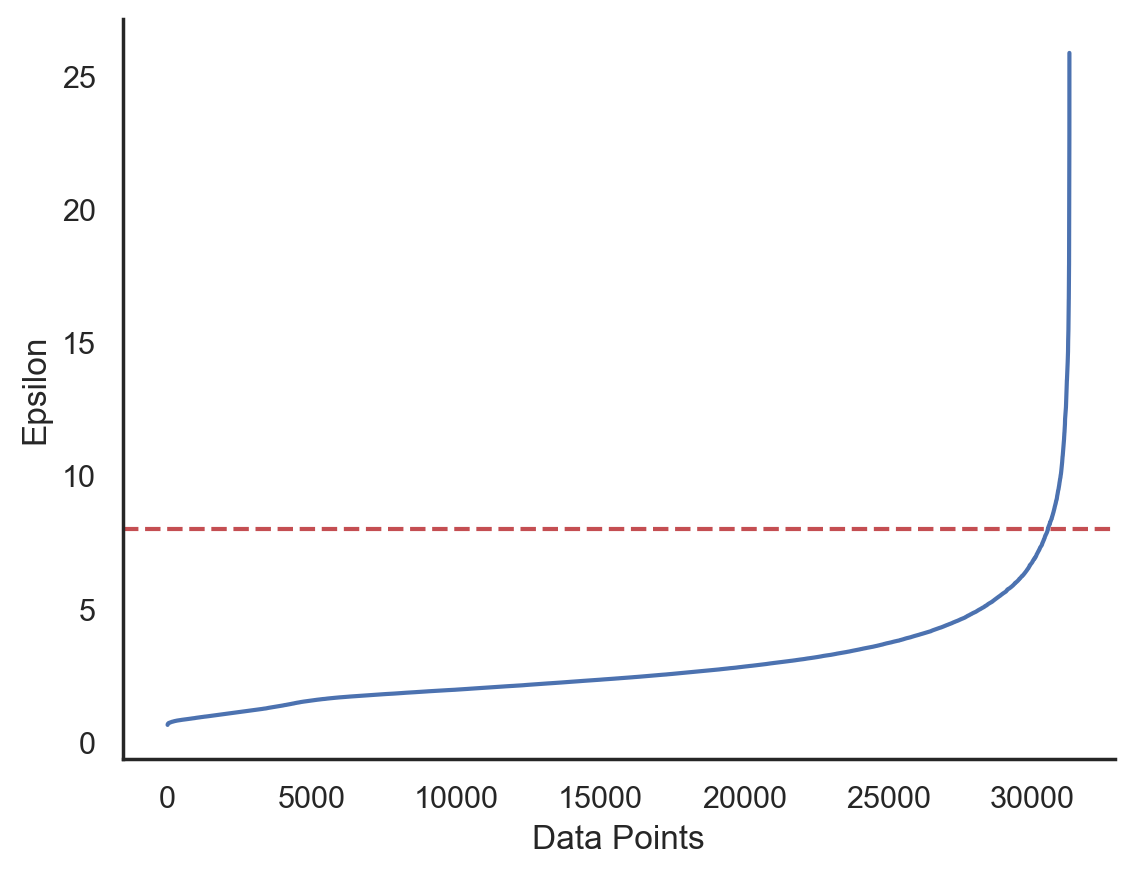

In [24]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=30)
neigh.fit(ABCDEats[metric_features])
distances, _ = neigh.kneighbors(ABCDEats[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)

# Put a horizontal line at y
plt.axhline(y=8, color='r', linestyle='--')
sns.despine(right=True, top=True)
plt.xlabel("Data Points")
plt.ylabel("Epsilon")
plt.show()

In [89]:
# Perform DBSCAN clustering                                     
dbscan = DBSCAN(eps=8,
                min_samples=10,
                n_jobs=2)
dbscan_labels = dbscan.fit_predict(ABCDEats[metric_features]) 

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


In [90]:
np.unique(dbscan_labels)

array([-1,  0], dtype=int64)

In [91]:
from collections import Counter
Counter(dbscan_labels)

Counter({0: 31020, -1: 259})

In [99]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats_concat, pd.Series(dbscan_labels, index=ABCDEats.index, name="dbscan_labels")], axis=1)
ABCDEats_concat.head()

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels,dbscan_labels
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40,0,0,0
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56,2,0,0
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,1.24,-0.40,0.76,-0.39,-0.38,-0

In [93]:
# Detecting noise (potential outliers)
ABCDEats_concat.loc[ABCDEats_concat['dbscan_labels'] == -1]

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,dbscan_labels
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9c5d8d6747,2360,-0.06,0.76,4.80,5.98,-1.19,-1.53,FREEBIE,CASH,-0.45,0.53,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.09,12.15,-0.18,-0.34,-0.27,-0.21,2.71,2.67,2.60,3.55,-0.65,2.39,5.92,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,5.48,0.91,-0.38,-0.37,1.12,-0.42,0.72,11.76,5.31,1.71,-0.21,-0.17,-0.17,4.50,2,1,-0.24,-0.92,True,2.52,Japanese,0.51,-0.59,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.82,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,4.16,1.80,0.37,-0.30,8.49,2.04,7.83,-0.25,1.34,-3.91,1,-1
63953d4795,8670,-0.06,6.59,4.26,3.63,-1.19,-0.19,FREEBIE,CASH,0.10,4.30,8.65,-0.15,-0.24,-0.22,5.31,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,1.94,-0.21,9.29,3.75,3.67,1.47,1.38,0.37,3.11,-0.17,-0.17,-0.19,-0.24,4.69,2.69,6.18,-0.22,4.20,1.24,2.21,3.12,0.91,4.69,1.43,4.16,4.60,-0.43,-0.39,-0.33,1.71,-0.21,-0.17,-0.17,5.22,8,1,0.82,-0.79,True,4.99,Asian,1.89,-0.21,0.03,0.45,0.29,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-6.50,2.44,4.67,0.44,2.99,-4.99,3.38,4.16,7.17,-4.60,0.63,1,-1
eb4664b1ac,2490,1.68,0.76,4.62,6.57,-1.19,0.24,NO PROMO,CARD,-0.45,-0.46,7.10,0.45,-0.24,-0.06,-0.19,-0.19,-0.25,-0.31,-0.33,3.24,-0.34,-0.27,4.94,-0.57,0.51,0.47,2.51,2.39,9.43,5.92,10.79,13.29,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,1.24,2.21,5.48,0.91,1.31,3.22,-0.40,-0.42,0.72,0.82,1.08,1.71,-0.21,-0.17,7.70,4.98,2,2,1.17,-0.73,False,1.3

In [30]:
# Computing the R^2 of the cluster solution
ABCDEats_nonoise = ABCDEats_concat.loc[ABCDEats_concat['dbscan_labels'] != -1]
sst = get_ss(ABCDEats[metric_features])  # get total sum of squares
ssw_labels = ABCDEats_nonoise.groupby(by='dbscan_labels')[metric_features].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.1318


---

#### **GMM (Gaussian Mixture Model)** [**<sup>[8]</sup>**](https://scikit-learn.org/1.5/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)

In [31]:
# Performing GMM clustering
# https://scikit-learn.org/1.5/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
gmm = GaussianMixture(n_components=4, 
                      covariance_type='full', 
                      n_init=10, 
                      init_params='kmeans', 
                      random_state=1)
gmm_labels = gmm.fit_predict(ABCDEats[metric_features])
labels_proba = gmm.predict_proba(ABCDEats[metric_features])

In [32]:
# The estimated component weights
gmm.weights_

array([0.32441632, 0.26160329, 0.17137323, 0.24260717])

In [33]:
# The estimated mean vectors of the Components
print(gmm.means_.shape)
# gmm.means_

(4, 26)


In [34]:
# The estimated covariance matrices of the Components
gmm.covariances_.shape

(4, 26, 26)

100%|██████████| 10/10 [07:01<00:00, 42.18s/it]


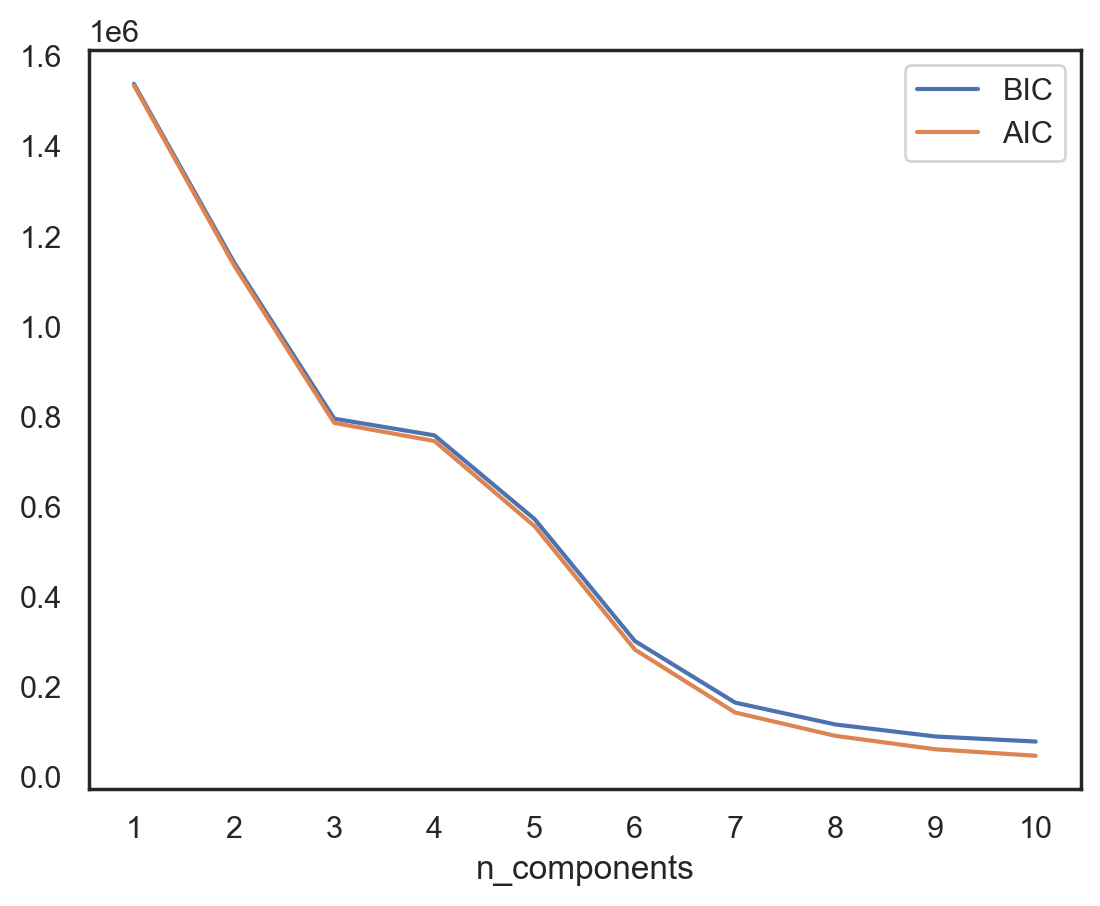

In [35]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(ABCDEats[metric_features])
          for n in tqdm(n_components)]

bic_values = [m.bic(ABCDEats[metric_features]) for m in models]
aic_values = [m.aic(ABCDEats[metric_features]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

## Time of Execution: 14m 52s

> Based on the plot above, we can see that the best number of clusters is $3$ (elbow method).

In [100]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=3, 
                      covariance_type='full', 
                      n_init=10, 
                      init_params='kmeans', 
                      random_state=1)
gmm_labels = gmm.fit_predict(ABCDEats[metric_features])

In [101]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats_concat, pd.Series(gmm_labels, index=ABCDEats.index, name="gmm_labels")], axis=1)
ABCDEats_concat.head()

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels,dbscan_labels,gmm_labels
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40,0,0,0,2
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56,2,0,0,1
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,1.24,-0.40,0.7

In [102]:
# Computing the R^2 of the cluster solution
sst = get_ss(ABCDEats[metric_features])  # get total sum of squares
ssw_labels = ABCDEats_concat.groupby(by='gmm_labels')[metric_features].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.1647


The $ \mathbb{R}^ 2 $ for this algorithm, even though it is still small, is higher than the R^2 for MeanShift and **DBSCAN**(?). 

---

# **👀 Different Perspectives**

In [39]:
# List of variables in different perspectives
value_vars = ['CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 
              'order_count', 
              'days_between_orders_per_order', 
              'chain_count']

behavior_vars = ['first_order', 'last_order',
                 'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 
                 'CUI_Chicken_Chinese_Noodle_PC', 'CUI_Healthy_NOTAmerican_PC', 
                 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',
                 'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC',
                 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

## **1. Value-Based Segmentation**

### **1.1. Mean Shift Clustering**

In [40]:
# The following bandwidth can be automatically detected using (we need to set quantile though)
# Based on distance to nearest neighbors for all observations
bandwidth = estimate_bandwidth(ABCDEats[value_vars], 
                              quantile=0.4,      # q = 0.2 -> 20% of the data is used to estimate the bandwidth (neighbours)
                              random_state=1, 
                              n_jobs=-1)
bandwidth

2.5179557520315567

In [41]:
for bandwidth in [3, 4, 5]:
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
    ms_labels = ms.fit_predict(ABCDEats[value_vars])
    ms_n_clusters = len(np.unique(ms_labels))
    print(f"Bandwidth: {bandwidth} -> Estimated Clusters: {ms_n_clusters}")

Bandwidth: 3 -> Estimated Clusters: 2
Bandwidth: 4 -> Estimated Clusters: 1
Bandwidth: 5 -> Estimated Clusters: 1


In [103]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift
bandwidth = 3

ms = MeanShift(bandwidth=bandwidth,     # Bandwidth to use
               bin_seeding=True,        # Use bin seeding to speed-up the algorithm
               n_jobs=-1)               # Use all available cores
ms_labels = ms.fit_predict(ABCDEats[value_vars])
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 2


In [104]:
# Absolute and Relative Frequency of the clusters
ms_cluster_counts = pd.Series(ms_labels).value_counts()
ms_cluster_freq = ms_cluster_counts / ms_cluster_counts.sum() * 100

# Create a DataFrame with the cluster counts and frequencies
ms_clusters_df = pd.DataFrame({'n': ms_cluster_counts.values, '%': ms_cluster_freq.values})
ms_clusters_df.index.name = 'Cluster'
ms_clusters_df

,n,%
Cluster,,
0,31116,99.48
1,163,0.52


In [105]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats_concat, pd.Series(ms_labels, index=ABCDEats.index, name="ms_labels_value")], axis=1)
ABCDEats_concat.head()

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels,dbscan_labels,gmm_labels,ms_labels_value
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40,0,0,0,2,0
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56,2,0,0,1,0
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22

In [45]:
# Computing the R^2 of the cluster solution
sst = get_ss(ABCDEats[value_vars])                                              # Get total sum of squares
ssw_labels = ABCDEats_concat.groupby(by='ms_labels_value')[value_vars].apply(get_ss)  # Compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)                                                       # Remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0934


---

### **1.2. DBSCAN**

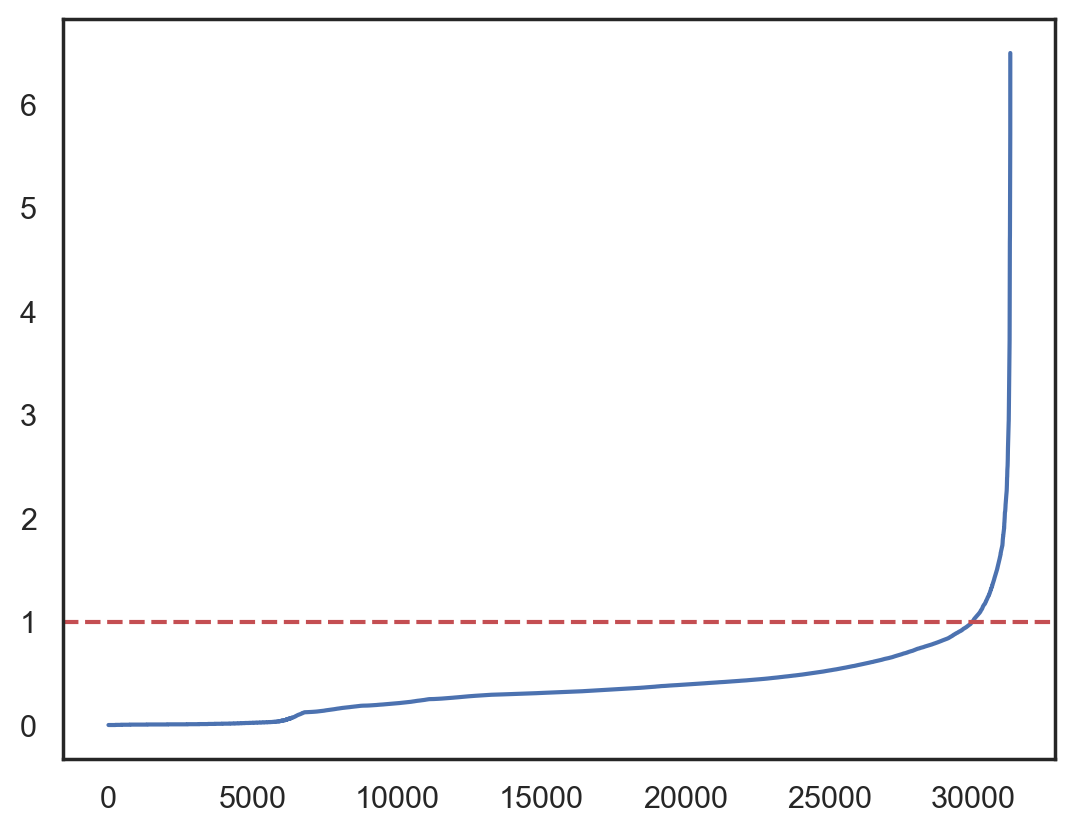

In [46]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=30)
neigh.fit(ABCDEats[value_vars])
distances, _ = neigh.kneighbors(ABCDEats[value_vars])
distances = np.sort(distances[:, -1])
plt.plot(distances)

# Put a horizontal line at y
plt.axhline(y=1, color='r', linestyle='--')

plt.show()

In [106]:
# Perform DBSCAN clustering                                     
dbscan = DBSCAN(eps=1, 
                min_samples=3, 
                n_jobs=-1)
dbscan_labels = dbscan.fit_predict(ABCDEats[value_vars]) 

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 10


In [107]:
np.unique(dbscan_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [108]:
from collections import Counter
Counter(dbscan_labels)

Counter({0: 31112, -1: 141, 4: 5, 7: 3, 1: 3, 2: 3, 3: 3, 5: 3, 6: 3, 8: 3})

In [109]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats_concat, pd.Series(dbscan_labels, index=ABCDEats.index, name="dbscan_labels_value")], axis=1)
ABCDEats_concat.head()

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels,dbscan_labels,gmm_labels,ms_labels_value,dbscan_labels_value
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40,0,0,0,2,0,0
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56,2,0,0,1,0,0
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.2

In [51]:
# Detecting noise (potential outliers)
ABCDEats_concat.loc[ABCDEats_concat['dbscan_labels_value'] == -1]

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,gmm_labels,ms_labels_value,dbscan_labels_value
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9c5d8d6747,2360,-0.06,0.76,4.80,5.98,-1.19,-1.53,FREEBIE,CASH,-0.45,0.53,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.09,12.15,-0.18,-0.34,-0.27,-0.21,2.71,2.67,2.60,3.55,-0.65,2.39,5.92,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,5.48,0.91,-0.38,-0.37,1.12,-0.42,0.72,11.76,5.31,1.71,-0.21,-0.17,-0.17,4.50,2,1,-0.24,-0.92,True,2.52,Japanese,0.51,-0.59,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.82,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,4.16,1.80,0.37,-0.30,8.49,2.04,7.83,-0.25,1.34,-3.91,0,0,-1
63953d4795,8670,-0.06,6.59,4.26,3.63,-1.19,-0.19,FREEBIE,CASH,0.10,4.30,8.65,-0.15,-0.24,-0.22,5.31,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,1.94,-0.21,9.29,3.75,3.67,1.47,1.38,0.37,3.11,-0.17,-0.17,-0.19,-0.24,4.69,2.69,6.18,-0.22,4.20,1.24,2.21,3.12,0.91,4.69,1.43,4.16,4.60,-0.43,-0.39,-0.33,1.71,-0.21,-0.17,-0.17,5.22,8,1,0.82,-0.79,True,4.99,Asian,1.89,-0.21,0.03,0.45,0.29,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-6.50,2.44,4.67,0.44,2.99,-4.99,3.38,4.16,7.17,-4.60,0.63,0,1,-1
36269ce6f1,4660,-1.08,0.37,4.80,1.27,-1.19,0.32,NO PROMO,CARD,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,13.74,-0.33,-0.18,5.71,-0.27,-0.21,10.39,2.67,3.67,3.55,3.41,-0.63,4.05,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,-0.42,-0.39,-0.38,-0.37,2.64,5.85,13.31,9.33,2.49,-0.27,-0.21,

In [52]:
# Computing the R^2 of the cluster solution
ABCDEats_nonoise = ABCDEats_concat.loc[ABCDEats_concat['dbscan_labels_value'] != -1]
sst = get_ss(ABCDEats[value_vars])  # get total sum of squares
ssw_labels = ABCDEats_nonoise.groupby(by='dbscan_labels_value')[value_vars].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0907


---

### **1.3. GMM**

In [53]:
# Performing GMM clustering
# https://scikit-learn.org/1.5/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
gmm = GaussianMixture(n_components=4, 
                      covariance_type='full', 
                      n_init=10, 
                      init_params='kmeans', 
                      random_state=1)
gmm_labels = gmm.fit_predict(ABCDEats[value_vars])
labels_proba = gmm.predict_proba(ABCDEats[value_vars])

In [54]:
# The estimated component weights
gmm.weights_

array([0.22339772, 0.23040896, 0.21822948, 0.32796384])

In [55]:
# The estimated mean vectors of the Components
print(gmm.means_.shape)
# gmm.means_

(4, 6)


In [56]:
# The estimated covariance matrices of the Components
gmm.covariances_.shape

(4, 6, 6)

100%|██████████| 10/10 [02:10<00:00, 13.04s/it]


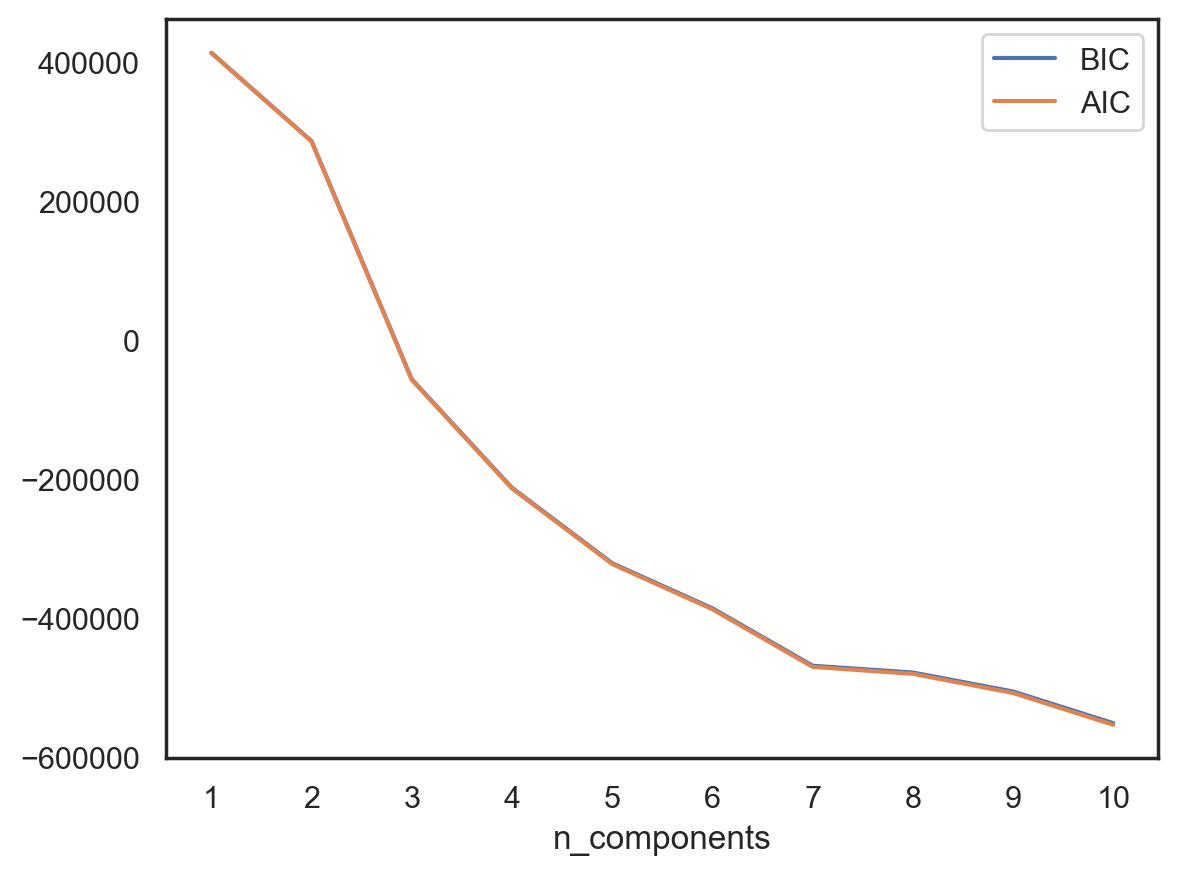

In [57]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(ABCDEats[value_vars])
          for n in tqdm(n_components)]

bic_values = [m.bic(ABCDEats[value_vars]) for m in models]
aic_values = [m.aic(ABCDEats[value_vars]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

> Based on the plot above, we can see that the best number of clusters is $5$ (elbow method).

In [111]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=5, 
                      covariance_type='full', 
                      n_init=10, 
                      init_params='kmeans', 
                      random_state=1)
gmm_labels = gmm.fit_predict(ABCDEats[value_vars])

In [112]:
# Absolute and Relative Frequency of the clusters
gmm_cluster_counts = pd.Series(gmm_labels).value_counts()
gmm_cluster_freq = gmm_cluster_counts / gmm_cluster_counts.sum() * 100

# Create a DataFrame with the cluster counts and frequencies
gmm_clusters_df = pd.DataFrame({'n': gmm_cluster_counts.values, '%': gmm_cluster_freq.values})
gmm_clusters_df.index.name = 'Cluster'
gmm_clusters_df

,n,%
Cluster,,
0,7599,24.29
1,7207,23.04
2,6826,21.82
3,5083,16.25
4,4564,14.59


In [113]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats_concat, pd.Series(gmm_labels, index=ABCDEats.index, name="gmm_labels_value")], axis=1)
ABCDEats_concat.head()

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels,dbscan_labels,gmm_labels,ms_labels_value,dbscan_labels_value,gmm_labels_value
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40,0,0,0,2,0,0,4
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56,2,0,0,1,0,0,4
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,

In [61]:
# Computing the R^2 of the cluster solution
sst = get_ss(ABCDEats[value_vars])  # get total sum of squares
ssw_labels = ABCDEats_concat.groupby(by='gmm_labels_value')[value_vars].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.4479


As seen by the $ \mathbb{R}^ 2 $, this is the algorithm that has better described the population in terms of value.

In [ ]:
ABCDEats[value_vars]['Cluster'] = gmm_labels

# Compute statistics for each cluster
cluster_summary = ABCDEats[value_vars].groupby(gmm_labels).agg(['mean', 'median', 'std'])

# Define a threshold
threshold = 0.3  # threshold value

# Apply the highlighting directly
styled_cluster_summary = cluster_summary.style.map(
    lambda x: 'background-color: olive' if abs(x) > threshold else '',
    subset=[(col, agg) for col in value_vars for agg in ['mean', 'median']]  # Multi-level targeting
)

# Display the styled DataFrame (Jupyter Notebook automatically renders styles)
styled_cluster_summary

C:\Users\André Silvestre\AppData\Local\Temp\ipykernel_14096\730378684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ABCDEats[value_vars]['Cluster'] = gmm_labels
C:\Users\André Silvestre\AppData\Local\Temp\ipykernel_14096\730378684.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_cluster_summary = cluster_summary.style.applymap(


These clusters highlight distinct customer behaviors, with Clusters 2 and 0 representing more engaged, higher-spending groups, while Clusters 3 and 1 depict lower engagement or infrequent ordering. Cluster 2 stands out with high total spending, diverse food preferences, and frequent orders across multiple chains, reflecting active and variable purchasing patterns. <br>
Cluster 0, though also moderately engaged, shows more consistent but lower spending and fewer food types ordered. In contrast, Cluster 1 represents less active customers with lower spending and infrequent orders, while Cluster 3 consists of the least engaged, spending minimally with sporadic purchases. Cluster 4 reflects a middle ground, showing moderate spending and occasional ordering. 

This will be more detailed in the profiling section.

---

## **2. Behavior-Based Segmentation**

### **2.1. Mean Shift Clustering**

In [63]:
# The following bandwidth can be automatically detected using (we need to set quantile though)
# Based on distance to nearest neighbors for all observations
bandwidth = estimate_bandwidth(ABCDEats[behavior_vars], 
                              quantile=0.4,
                              random_state=1, 
                              n_jobs=-1)
bandwidth

5.217716521719711

In [64]:
# bandwidth
for bandwidth in [6, 7, 8, 9]:
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
    ms_labels = ms.fit_predict(ABCDEats[behavior_vars])
    ms_n_clusters = len(np.unique(ms_labels))
    print(f"Bandwidth: {bandwidth} -> Estimated Clusters: {ms_n_clusters}")

Bandwidth: 6 -> Estimated Clusters: 38
Bandwidth: 7 -> Estimated Clusters: 15
Bandwidth: 8 -> Estimated Clusters: 14
Bandwidth: 9 -> Estimated Clusters: 12


In [65]:
# bandwidth
for bandwidth in [10, 11, 12, 13, 14]:
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
    ms_labels = ms.fit_predict(ABCDEats[behavior_vars])
    ms_n_clusters = len(np.unique(ms_labels))
    print(f"Bandwidth: {bandwidth} -> Estimated Clusters: {ms_n_clusters}")

Bandwidth: 10 -> Estimated Clusters: 7
Bandwidth: 11 -> Estimated Clusters: 5
Bandwidth: 12 -> Estimated Clusters: 3
Bandwidth: 13 -> Estimated Clusters: 1
Bandwidth: 14 -> Estimated Clusters: 1


In [114]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift

bandwidth = 12
ms = MeanShift(bandwidth=bandwidth,     # Bandwidth to use
               bin_seeding=True,        # Use bin seeding to speed-up the algorithm
               n_jobs=-1)               # Use all available cores
ms_labels = ms.fit_predict(ABCDEats[behavior_vars])
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 3


In [115]:
# Absolute and Relative Frequency of the clusters
ms_cluster_counts = pd.Series(ms_labels).value_counts()
ms_cluster_freq = ms_cluster_counts / ms_cluster_counts.sum() * 100

# Create a DataFrame with the cluster counts and frequencies
ms_clusters_df = pd.DataFrame({'n': ms_cluster_counts.values, '%': ms_cluster_freq.values})
ms_clusters_df.index.name = 'Cluster'
ms_clusters_df

,n,%
Cluster,,
0,31209,99.78
1,40,0.13
2,30,0.10


In [116]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats_concat, pd.Series(ms_labels, index=ABCDEats.index, name="ms_labels_behavior")], axis=1)
ABCDEats_concat.head()

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels,dbscan_labels,gmm_labels,ms_labels_value,dbscan_labels_value,gmm_labels_value,ms_labels_behavior
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40,0,0,0,2,0,0,4,0
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56,2,0,0,1,0,0,4,0
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59

In [69]:
# Computing the R^2 of the cluster solution
sst = get_ss(ABCDEats[behavior_vars])                                              # Get total sum of squares
ssw_labels = ABCDEats_concat.groupby(by='ms_labels_behavior')[behavior_vars].apply(get_ss)  # Compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)                                                       # Remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0274


---

### **2.2. DBSCAN**

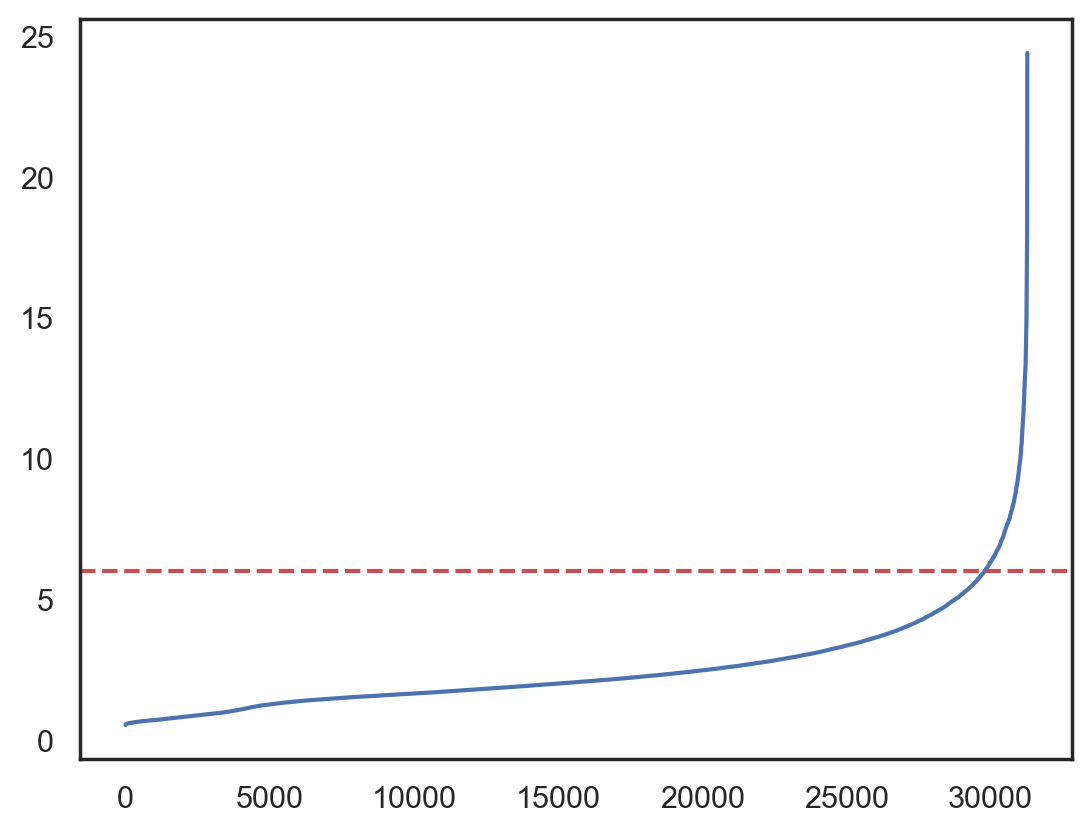

In [70]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=30)
neigh.fit(ABCDEats[behavior_vars])
distances, _ = neigh.kneighbors(ABCDEats[behavior_vars])
distances = np.sort(distances[:, -1])
plt.plot(distances)

# Put a horizontal line at y
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

In [117]:
# Perform DBSCAN clustering                                     
dbscan = DBSCAN(eps=6, min_samples=3, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(ABCDEats[behavior_vars]) 

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 6


In [118]:
np.unique(dbscan_labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [119]:
from collections import Counter
Counter(dbscan_labels)

Counter({0: 30720, -1: 545, 1: 4, 2: 4, 3: 3, 4: 3})

In [120]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats_concat, pd.Series(dbscan_labels, index=ABCDEats.index, name="dbscan_labels_behavior")], axis=1)
ABCDEats_concat.head()

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels,dbscan_labels,gmm_labels,ms_labels_value,dbscan_labels_value,gmm_labels_value,ms_labels_behavior,dbscan_labels_behavior
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40,0,0,0,2,0,0,4,0,0
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56,2,0,0,1,0,0,4,0,0
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,

In [121]:
# Detecting noise (potential outliers)
ABCDEats_concat.loc[ABCDEats_concat['dbscan_labels_behavior'] == -1]

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels,dbscan_labels,gmm_labels,ms_labels_value,dbscan_labels_value,gmm_labels_value,ms_labels_behavior,dbscan_labels_behavior
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9c5d8d6747,2360,-0.06,0.76,4.80,5.98,-1.19,-1.53,FREEBIE,CASH,-0.45,0.53,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.09,12.15,-0.18,-0.34,-0.27,-0.21,2.71,2.67,2.60,3.55,-0.65,2.39,5.92,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,5.48,0.91,-0.38,-0.37,1.12,-0.42,0.72,11.76,5.31,1.71,-0.21,-0.17,-0.17,4.50,2,1,-0.24,-0.92,True,2.52,Japanese,0.51,-0.59,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.82,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,4.16,1.80,0.37,-0.30,8.49,2.04,7.83,-0.25,1.34,-3.91,1,3,-1,0,0,-1,2,0,-1
a5347d72ea,2360,1.24,-0.01,1.38,0.09,-1.19,-1.14,NO PROMO,CARD,-0.45,-0.46,-0.30,-0.15,7.59,-0.22,-0.19,-0.19,1.16,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,1.62,0.51,2.60,0.43,0.36,-0.63,1.24,7.14,3.19,2.94,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,1.43,-0.40,0.83,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,15.57,1.40,2,2,0.07,-0.61,False,-0.12,Chicken Dishes,-0.18,-0.91,0.00,0.00,0.00,0.00,0.74,0.00,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.70,-2.85,2.16,-0.43,2.16,-0.42,-2.08,-0.01,5.37,8.09,8.20,1,1,0,0,0,0,2,0,-1
4d43db4f0a,2360,0.95,0.76,4.08,5.10,-1.19,-0.93,NO PROMO,CARD,7.81,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,0.68,-0.33,-0.18,-0.34,-0.27,3.98,1.62,0.51,0.47,-

In [76]:
# Computing the R^2 of the cluster solution
ABCDEats_nonoise = ABCDEats_concat.loc[ABCDEats_concat['dbscan_labels_behavior'] != -1]
sst = get_ss(ABCDEats[behavior_vars])  # get total sum of squares
ssw_labels = ABCDEats_nonoise.groupby(by='dbscan_labels_behavior')[behavior_vars].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.2124


---

### **2.3. GMM**

In [77]:
# Performing GMM clustering
# https://scikit-learn.org/1.5/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
gmm = GaussianMixture(n_components=4, 
                      covariance_type='full', 
                      n_init=10, 
                      init_params='kmeans', 
                      random_state=1)
gmm_labels = gmm.fit_predict(ABCDEats[behavior_vars])
labels_proba = gmm.predict_proba(ABCDEats[behavior_vars])

In [78]:
# The estimated component weights
gmm.weights_

array([0.10758328, 0.23164986, 0.36614719, 0.29461967])

In [79]:
# The estimated mean vectors of the Components
print(gmm.means_.shape)
# gmm.means_

(4, 20)


In [80]:
# The estimated covariance matrices of the Components
gmm.covariances_.shape

(4, 20, 20)

 40%|████      | 4/10 [00:53<01:43, 17.26s/it]c:\Anaconda3\envs\DM2425\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
100%|██████████| 10/10 [06:32<00:00, 39.25s/it]


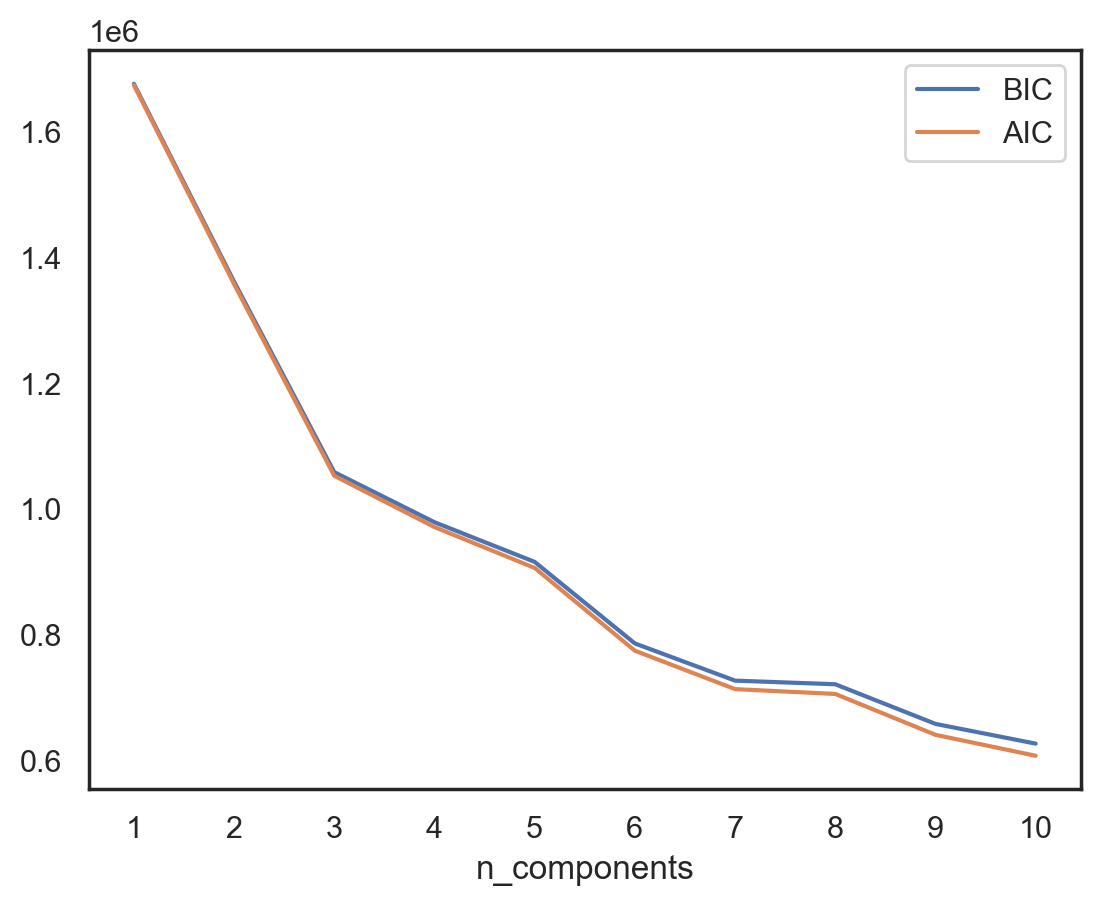

In [81]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(ABCDEats[behavior_vars])
          for n in tqdm(n_components)]

bic_values = [m.bic(ABCDEats[behavior_vars]) for m in models]
aic_values = [m.aic(ABCDEats[behavior_vars]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

> Based on the plot above, we can see that the best number of clusters is $3$ (elbow method).

In [122]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=3, 
                      covariance_type='full', 
                      n_init=10, 
                      init_params='kmeans', 
                      random_state=1)
gmm_labels = gmm.fit_predict(ABCDEats[behavior_vars])

In [123]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats_concat, pd.Series(gmm_labels, index=ABCDEats.index, name="gmm_labels_behavior")], axis=1)
ABCDEats_concat.head()

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels,dbscan_labels,gmm_labels,ms_labels_value,dbscan_labels_value,gmm_labels_value,ms_labels_behavior,dbscan_labels_behavior,gmm_labels_behavior
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40,0,0,0,2,0,0,4,0,0,0
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56,2,0,0,1,0,0,4,0,0,2
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25

In [84]:
# Computing the R^2 of the cluster solution
sst = get_ss(ABCDEats[behavior_vars])  # get total sum of squares
ssw_labels = ABCDEats_concat.groupby(by='gmm_labels_behavior')[behavior_vars].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.1230


In [85]:
# Add the GMM cluster labels to the DataFrame
ABCDEats['Cluster'] = gmm_labels

# Compute the mean, median, and standard deviation of each cluster for interpretation
cluster_summary = ABCDEats.groupby('Cluster')[behavior_vars].agg(['mean', 'median', 'std'])

# Define a threshold for highlighting
threshold = 0.3  # Adjust this value as needed

# Apply the styling to highlight values greater than the threshold in the mean and median columns
styled_cluster_summary = cluster_summary.style.applymap(
    lambda x: 'background-color: olive' if abs(x) > threshold else '', 
    subset=[(col, 'mean') for col in behavior_vars] + [(col, 'median') for col in behavior_vars]  # Specify 'mean' and 'median' for each variable
)

# Display the styled DataFrame (Jupyter Notebook automatically renders styles)
styled_cluster_summary

C:\Users\André Silvestre\AppData\Local\Temp\ipykernel_14096\3915321445.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_cluster_summary = cluster_summary.style.applymap(


Cluster 0 represents customers who exhibit a balanced engagement across different food types and ordering times, with mean values around zero for most food categories. However, this cluster shows a stronger preference for weekend orders, particularly on Saturdays and Sundays. Cluster 1, on the other hand, shows higher engagement with specific cuisines such as American, Indian, and Japanese, especially on weekdays. This group tends to order more frequently during lunch, dinner, and late-night periods, with values well above average in these time slots. Cluster 2, in contrast, includes customers with moderate to low engagement across most food types and times, with a more varied ordering behavior and a preference for afternoon and evening orders.

These clusters suggest a segmentation where Cluster 0 represents moderate or balanced customers, Cluster 1 includes highly engaged customers with specific preferences, and Cluster 2 is composed of less active, more inconsistent customers.

More details will be explored in the Profiling section.

---

## **💾 Save ***Density Based Clustering*** Solution**

In [124]:
ABCDEats_concat

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,Proportion_CUI_American,Proportion_CUI_Asian,Proportion_CUI_Beverages,Proportion_CUI_Cafe,Proportion_CUI_Chicken Dishes,Proportion_CUI_Chinese,Proportion_CUI_Desserts,Proportion_CUI_Healthy,Proportion_CUI_Indian,Proportion_CUI_Italian,Proportion_CUI_Japanese,Proportion_CUI_Noodle Dishes,Proportion_CUI_OTHER,Proportion_CUI_Street Food / Snacks,Proportion_CUI_Thai,payment_method_CASH,payment_method_DIGI,last_promo_bin_True,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,CUI_NOTAsian_Italian_OTHER_NOTSnack_PC,CUI_American_Cafe_Japanese_PC,CUI_Chicken_Chinese_Noodle_PC,CUI_Healthy_NOTAmerican_PC,CUI_Indian_PC,CUI_Japanese_NOTBeverages_PC,CUI_Beverages_Thai_PC,HR_Lunch_Dinner_PC,HR_LateNight_Breakfast_PC,HR_Evening_PC,HR_AfternoonSnack_PC,Cluster,ms_labels,dbscan_labels,gmm_labels,ms_labels_value,dbscan_labels_value,gmm_labels_value,ms_labels_behavior,dbscan_labels_behavior,gmm_labels_behavior
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,-1.37,-0.40,-0.06,-0.49,-1.19,-2.70,DELIVERY,DIGI,-0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,4.78,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,-0.40,-0.42,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,2.04,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,2,1,-1.16,-1.01,True,-0.19,Indian,-0.87,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,-0.39,-1.06,0.16,3.59,0.43,-1.25,-0.29,-1.06,0.24,-0.40,0,0,0,2,0,0,4,0,0,0
5d272b9dcb,8670,-1.51,-0.40,-0.60,-0.20,-1.19,-2.70,DISCOUNT,DIGI,0.80,-0.15,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25,-0.31,-0.33,-0.18,-0.34,-0.27,-0.21,0.52,-0.57,-0.59,-0.61,-0.65,-0.63,0.31,-0.17,-0.17,-0.19,-0.24,-0.24,-0.23,-0.21,-0.22,-0.26,-0.34,0.90,0.76,-0.39,-0.38,-0.37,-0.40,-0.42,-0.43,-0.39,-0.33,-0.27,-0.21,-0.17,-0.17,-0.51,8,1,-1.16,-1.01,True,-0.44,American,-0.18,-0.08,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.21,-0.05,-0.55,-0.37,-0.33,-0.17,-0.08,-0.60,-0.41,-0.32,-0.56,2,0,0,1,0,0,4,0,0,2
f6d1b2ba63,4660,1.53,-0.79,-0.60,-0.20,-1.19,-2.70,DISCOUNT,CASH,0.45,-0.46,-0.30,-0.15,-0.24,-0.22,-0.19,-0.19,-0.25

In [125]:
# Save the cluster labels of the 4 Cluster Solution []] to a parquet file [index + labels]
ABCDEats_concat[['gmm_labels', 'gmm_labels_value', 'gmm_labels_behavior',
                 'ms_labels', 'ms_labels_value', 'ms_labels_behavior',
                 'dbscan_labels', 'dbscan_labels_value', 'dbscan_labels_behavior'
                 ]].to_parquet('data/DM2425_ABCDEats_DensityBasedClustering.parquet')

---